# Jupyter Notebooks, Numerical Analysis and Plotting

We will discuss how you can make interactive supplementary materials with Jupyter notebooks and briefly take a look on the numerical tools one can find in Python.

## Jupyter notebooks

[Jupyter](https://jupyter.org/) is a project that aims to provide an open-source toolset for interactive computing. This toolset is centered about the core concept of a notebook, and this is what we are going to talk about today.

A Jupyter notebook is an interactive document that contain live code, equations, images and rich text. The document consists of a series of cells. The cells can be edited and then run by pressing <kbd>Run</kbd> button on the panel or by hitting <kbd>Shift</kbd>+<kbd>Enter</kbd> on the keyboard. What happens when you run a cell depends on the cell type. There are three of those:

- **Markdown** -- this is a static cell that contains text in markdown format. When you evaluate it, it is being rendrered and then the result is displayed instead of the code. The very next cell ("A sample problem") is a markdown cell. You can view the markdown source by double clicking on it.
- **Code** -- this cell contains code. When you evaluate the cell, the code is being sent to the interpreter and the last expression in the cell gives you the evaluation result, which is then displayed inside the cell just after the code. You can edit a code cell by clicking anywhere inside the code area within the cell.

As an example of the markdown cell consider the cell below.

### Double pendulum

<img src="double-pendulum.png" width=300/>

The dynamics of the pendulum is governed by the following system of coupled nonlineary equations
$$
\dot \theta_1 = 
  \frac{6}{m l^2}
  \frac
    {2 p_1 - 3 \cos(\theta_1 - \theta_2) p_2}
    {16 - 9 \cos^2 (\theta_1 - \theta_2)}
\\
\dot \theta_2 = 
  \frac{6}{m l^2}
  \frac
    {8 p_2 - 3 \cos(\theta_1 - \theta_2) p_1}
    {16 - 9 \cos^2 (\theta_1 - \theta_2)}
\\
\dot p_1 = 
  - \frac{m l^2}{2} \left(
    \dot \theta_1 \dot \theta_2
    \sin(\theta_1 - \theta_2) +
    3 \frac{g}{l} \sin \theta_1
  \right)
\\
\dot p_2 = 
  - \frac{m l^2}{2} \left(
    - \dot \theta_1 \dot \theta_2
    \sin(\theta_1 - \theta_2) +
    \frac{g}{l} \sin \theta_1
  \right)
$$

In [1]:
# This is a code cell. You can edit the code and then 

x = "Hi there!"
x

'Hi there!'

How can we use it?

First of all, as an interactive computing environment for exploration tasks. A notebook is associated to a so-called computational core -- a single python session running in background -- that is common for all cells. Which means that once you evaluate a  computationally heavy cell, the objects defined in there survive in memory. No need to re-evaluate the script time after time. This should sound familiar to MATLAB users.

Second, as an interactive supplementary material that actually reproduces the results. Thankfully, most people in CS share their code now, but reproducing the results presented in the paper still can be tricky. If you do your data processing and plotting inside a notebook, you can actually share it. The format is open, the Jupyter itself is free, and it's slowly becoming a de-facto standard to share the results in some fields.

For a proper tutorial and a demo please refer to the excellent guide ([here](https://jupyter.org/try) is the entry point) on Jupyter's website.

We, in the meantime, continue our overview of computational tools in python.

## Fundamental linear algebra

Numeric linear algebra is not a part of the core python language (unlike MATLAB) and not even a part of a standar library. However, there is library that is universally accepted as a de-facto standard and it's called [numpy](https://numpy.org/).

In [2]:
import numpy as np

Numpy allows you to create fast and efficient n-dimenional arrays. Here is how you can make a vector and a matrix:

In [3]:
x = np.array([1, 0])

R = np.array([
    [np.cos(np.pi / 4), -np.sin(np.pi / 4)], 
    [np.sin(np.pi / 4),  np.cos(np.pi / 4)]
])

print(x)
print(R)

[1 0]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Arrays can have arbitrary number of dimensions. For example, we can pack all the Pauli matrices in a single array:

In [4]:
Pauli = np.array([
    # sigma_0
    [[1, 0],
     [0, 1]],
    
    # sigma_1
    [[0, 1],
     [1, 0]],
    
    # sigma_2
    [[0, -1j],
     [1j, 0]],
    
    # sigma_3
    [[1, 0],
     [0, -1]]
])

Pauli[2]

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

Each array is characterized by it's shape -- a tuple defining number of rows, columns (and other dimensions).

In [5]:
print(x.shape)
print(R.shape)
print(Pauli.shape)

(2,)
(2, 2)
(4, 2, 2)


The arrays are typed. Type of an array is deduced from the type the elements.

In [6]:
z = np.array([0, 0])
print(z.dtype)

int64


In [7]:
z[0] = 1.5
print(z)

[1 0]


In [8]:
z = np.array([0.0, 0.0])
print(z.dtype)

float64


In [9]:
z[0] = 1.0 + 1.0j

TypeError: can't convert complex to float

You can specify the type directly when you create the array.

In [10]:
z = np.array([0.0, 0.0], dtype=np.complex)
z[0] = 1.0 + 1.0j

print(z)

[1.+1.j 0.+0.j]


`numpy` also provides vectorized operations on the array. This includes arithmethics:

In [11]:
a = np.array([0.0, 1.0])
b = np.array([1.0, 1.0])

print(a + b)
print(a - b)
print(a * b)
print(a / b)

[1. 2.]
[-1.  0.]
[0. 1.]
[0. 1.]


Please note, that `*` is the element-wise product. If you want a matrix product, you should use either of the options below:

In [12]:
np.dot(R, x)
R.dot(x)
R @ x

array([0.70710678, 0.70710678])

There are also other vectorized elementary functions, including basic trigonometric ones, square roots, powers and so on.

In [13]:
x = np.linspace(-np.pi/2, +np.pi/2, 100)

C = np.cos(x)
S = np.sin(x)
E = np.exp(1j * x)

E - (C + 1j * S)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

There are also standard constructors one could expect:

In [14]:
A = np.zeros((10, 10))
print(A)

A = np.ones((10, 10))
print(A)

A = np.eye(10)
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


There are also some basic advanced operations on matrices, like inversion and SVD decomposition.

In [15]:
np.linalg.inv(R)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [16]:
u, s, v = np.linalg.svd(R)

print(u)
print(s)
print(v)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1. 1.]
[[-1. -0.]
 [ 0.  1.]]


## Numerical methods

`numpy` provides only the very basic data types and operation on arrays, but there is a sibling library called [scipy](https://scipy.org/) that provides a huge family of numerical methods, except maybe fore the very advanced and specific ones. But in general, if you need anything related to special functions, numerical quadratures, optimization problems, interpolation, Fourier transforms, advanced linear algebra, etc. -- you will find it in `scipy.`

`scipy` is tightly coupled to numpy and operates on `numpy` data structures. On top of that, there is section in `scipy` that is dealing with sparse matrices, including basic data structures and algorithms on them.

We will demonstrate some of the cool things from `scipy` below, after we talk about plotting.

## Scientific plotting

There are several plotting facilities in python, but the most popular one is `matplotlib`. With `matplotlib` you can plot simple line-plots, scatterplots, barcharts, pie charts, display images, plot 3D shapes and even do animations. It's not always straightforward, but it comes with an excellent [example gallery](https://matplotlib.org/gallery/index.html). If you cannot figure out how to do something in `matplotlib`, chances are there is an example code with a picture in the gallery.

It is also integrated with Jupyter and you can insert `matplotlib` plots in your document. All you need to do is execute the following magic command

In [17]:
%matplotlib notebook

So let's do some example plots.

### Line plot and scatter plot

<IPython.core.display.Javascript object>


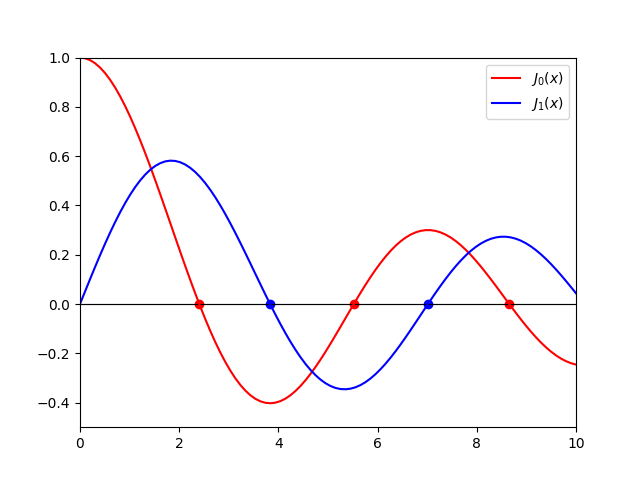

In [18]:
from matplotlib import pyplot
from scipy.special import j0, j1, jn_zeros

x = np.linspace(0, 10, 100)

x00 = jn_zeros(0, 10)
x01 = jn_zeros(1, 10)

pyplot.figure(1)
pyplot.plot(x, np.zeros_like(x), color="black", linewidth=0.85)

pyplot.plot(x, j0(x), color="red", label="$J_0(x)$")
pyplot.plot(x, j1(x), color="blue", label="$J_1(x)$")

pyplot.scatter(x00, np.zeros_like(x00), color="red")
pyplot.scatter(x01, np.zeros_like(x01), color="blue")

pyplot.xlim(0.0, 10.0)
pyplot.ylim(-0.5, 1.0)
pyplot.legend()

### 2D images and some Fourier

You can also plot a 2D image. Here is an example image that ships with `scipy`.

<IPython.core.display.Javascript object>


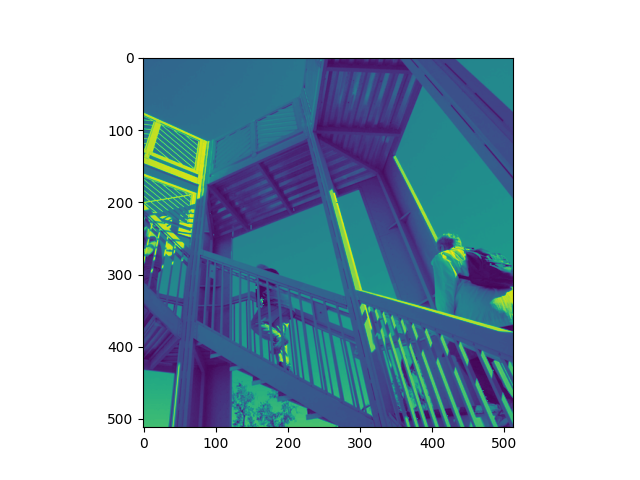

In [19]:
from scipy.misc import ascent


image = ascent()

pyplot.figure()
pyplot.imshow(image)

If we want to take a look at the Fourier transform of the image, we can use `fft` module that is shipped by `scipy`.

<IPython.core.display.Javascript object>


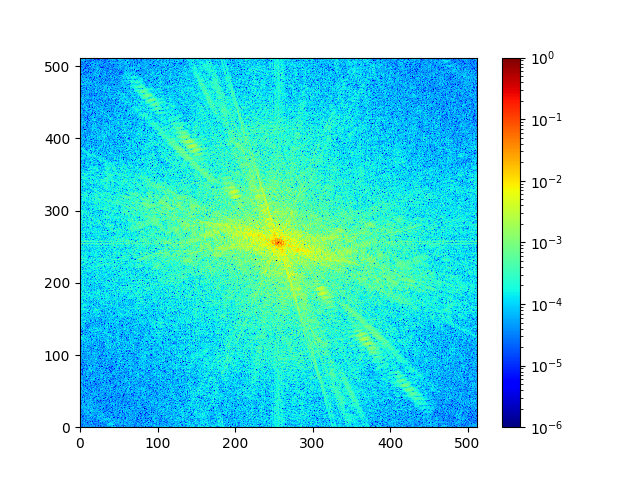

In [30]:
from matplotlib import colors
from scipy import fft


fourier_image = fft.fft2(image, norm="ortho")
fourier_image = fft.fftshift(fourier_image)

im = abs(fourier_image)
im = im / im.max()

pyplot.figure()
pyplot.pcolormesh(im, norm=colors.LogNorm(vmin=1E-6, vmax=1), cmap="jet")
pyplot.colorbar()

Let's create a square low-pass mask and filter everything outside of it.

<IPython.core.display.Javascript object>


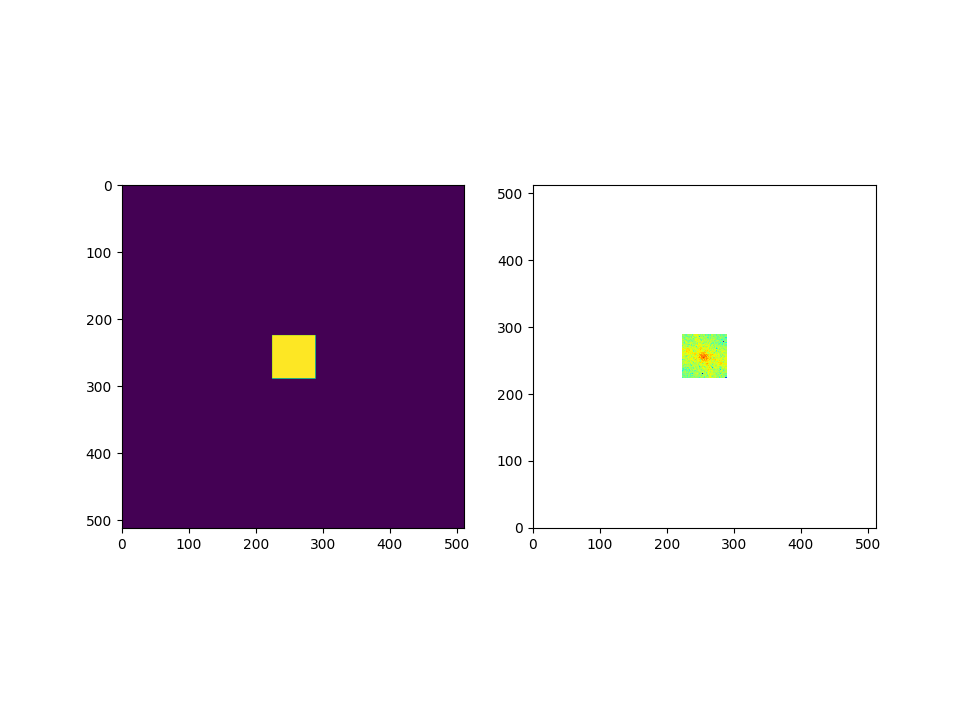

In [29]:
X = np.array(range(0, 512))
Y = np.array(range(0, 512))

X, Y = np.meshgrid(X, Y)

mask = np.ones_like(X)
mask[(abs(X - 256) > 32) | (abs(Y - 256) > 32)] = 0

pyplot.figure()

pyplot.subplot(1, 2, 1)
pyplot.imshow(mask)

filtered_fourier_image = mask * fourier_image

im = abs(filtered_fourier_image)
im = im / im.max()

pyplot.subplot(1, 2, 2)
pyplot.pcolormesh(im, norm=colors.LogNorm(vmin=1E-6, vmax=1), cmap="jet")
pyplot.gca().set_aspect("equal")

What we get after reverse Fourier transform is, unsurprisingly, is a blurred version of the input image (with some artefacts caused by Gibbs phenomenon).

<IPython.core.display.Javascript object>


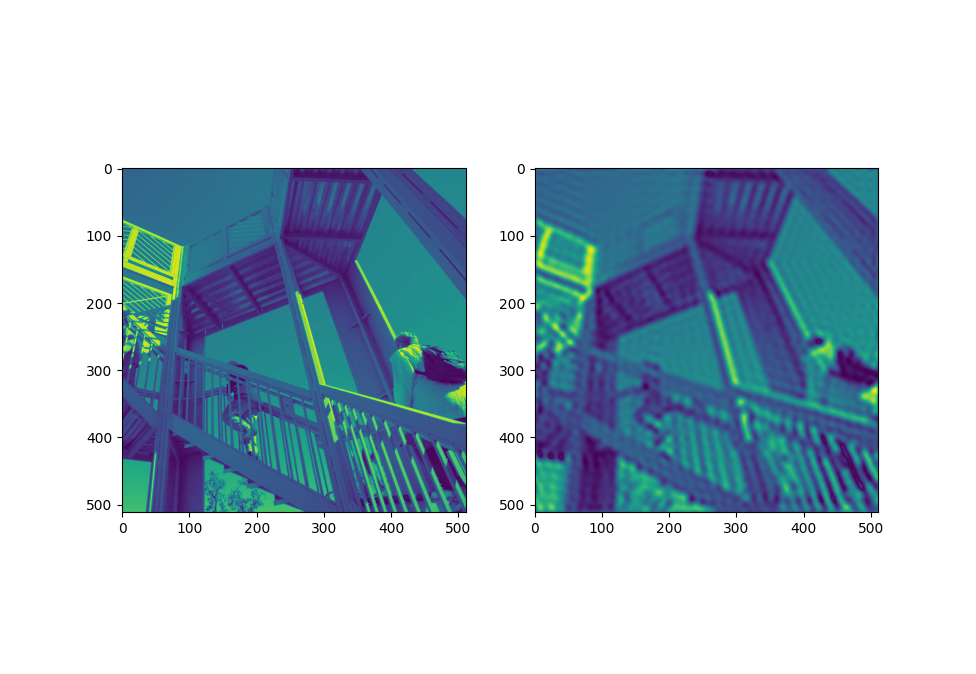

In [31]:
filtered_image = fft.ifft2(fft.fftshift(filtered_fourier_image), norm="ortho")


pyplot.figure()

pyplot.subplot(1, 2, 1)
pyplot.imshow(image)

pyplot.subplot(1, 2, 2)
pyplot.imshow(abs(filtered_image))

### 3D surface plots

Let's do something simple, for example find a minimum of a two-parametric function.

<IPython.core.display.Javascript object>


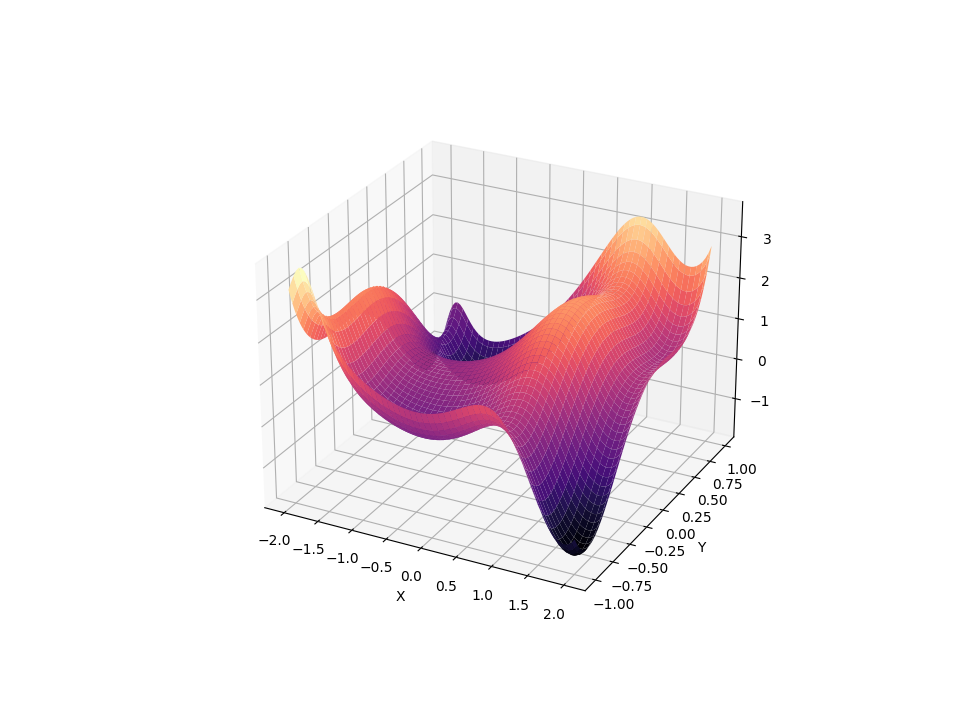

Text(0.5, 0, 'Y')

In [32]:
from mpl_toolkits.mplot3d import Axes3D


def camelback(x, y):
    return (4 - 2.1 * x**2 + x**4/3)**x + x*y + (-4 + 4*y**2) * y**2


X = np.linspace(-2, +2, 100)
Y = np.linspace(-1, +1, 100)
X, Y = np.meshgrid(X, Y)


fig = pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, camelback(X, Y), cmap="magma")
ax.set_xlabel("X")
ax.set_ylabel("Y")

Let's find a minimum of the function.

In [36]:
from scipy.optimize import minimize


result = minimize(
    lambda r: camelback(r[0], r[1]), 
    [0.0, 0.0],
    bounds=[(-2, +2), (-1, +1)])
                  
print(result.x)
print(result.fun)
print(camelback(X, Y).min())

[-1.19575774  0.7724926 ]
-1.3480687741078055
-1.8592664426638636


### Animated plots

To demonstrate animated plot, let's integrate the double pendulum system. We will use `scipy`s method `odeint`.

In [37]:
from scipy.integrate import odeint


m = 1.0  # kg
l = 1.0  # m
g = 9.8  # m / s^2


def rhs(state, t):
    th1, th2, p1, p2 = state

    cos_ = np.cos(th1 - th2)
    sin_ = np.sin(th1 - th2)

    ml2 = m * l**2
    denom = 16 - 9 * cos_**2

    dth1 = 6/ml2 * (2 * p1 - 3 * cos_ * p2) / denom
    dth2 = 6/ml2 * (8 * p2 - 3 * cos_ * p1) / denom
    dp1 = -0.5 * ml2 * (  dth1 * dth2 * sin_ + 3 * g/l * np.sin(th1))
    dp2 = -0.5 * ml2 * (- dth1 * dth2 * sin_ +     g/l * np.sin(th2))

    return np.array([dth1, dth2, dp1, dp2])


t = np.arange(0, 60, 0.01)
state0 = np.array([
    np.pi/2,
    np.pi/2,
    0.0, 
    0.0
])
states = odeint(rhs, state0, t)


print(states)


th1 = states[:, 0]
th2 = states[:, 1]
p1 = states[:, 2]
p2 = states[:, 3]

[[ 1.57079633  1.57079633  0.          0.        ]
 [ 1.57016633  1.57100633 -0.14699999 -0.04899998]
 [ 1.56827633  1.57163631 -0.29399995 -0.09799982]
 ...
 [-0.99879631 18.7238132   1.44143294 -2.13518672]
 [-0.96196544 18.62353126  1.43070057 -1.99376719]
 [-0.91939644 18.51561715  1.40883672 -1.83959759]]


Animated plots are not trivial, but it's not that difficult: you have to set up the objects on the plot and then provide two functions -- one that draws the initial position, and another one that draws the next frame.

In [1]:
from matplotlib import animation


fig, axis = pyplot.subplots()

axis.set_aspect("equal")
axis.set_xlim([-2.5, +2.5])
axis.set_ylim([-2.5, +2.5])
axis.set_xlabel(r"$x$")
axis.set_ylabel(r"$y$")


arm1, *_ = pyplot.plot([], [], color="black", linewidth=2)
arm2, *_ = pyplot.plot([], [], color="black", linewidth=2)

pivot = pyplot.scatter([], [], color="black", marker="x")
joint = pyplot.scatter([], [], color="black", marker="o")
end = pyplot.scatter([], [], color="black", marker="o")

trace_joint, *_ = pyplot.plot([], [], color="red", linewidth=0.5, zorder=-1)
trace_end, *_ = pyplot.plot([], [], color="blue", linewidth=0.5, zorder=-1)


def xy_coords(theta1, theta2):
    x1 = l * np.sin(theta1)
    x2 = l * (np.sin(theta1) + np.sin(theta2))
    y1 = - l * np.cos(theta1)
    y2 = - l * (np.cos(theta1) + np.cos(theta2))
    return x1, y1, x2, y2


def draw_state(n):
    state = states[n, :]

    theta1 = state[0]
    theta2 = state[1]

    x1, y1, x2, y2 = xy_coords(theta1, theta2)

    # Update the lines
    arm1.set_data([0, x1], [0, y1])
    arm2.set_data([x1, x2], [y1, y2])

    # Update the points
    pivot.set_offsets([0, 0])
    joint.set_offsets([x1, y1])
    end.set_offsets([x2, y2])
    
    # Update the plot title
    axis.set_title("t = {:.2f} seconds".format(t[n]))
    
    # Draw traces
    m = max(0, n - 500)
    theta1 = states[m:n, 0]
    theta2 = states[m:n, 1]
    x1, y1, x2, y2 = xy_coords(theta1, theta2)
    
    trace_joint.set_data(x1, y1)
    trace_end.set_data(x2, y2)
    
    
def init_plot():
    draw_state(0)

    
def update_plot(n):
    draw_state(n)


anim = animation.FuncAnimation(
    fig=fig, func=update_plot, 
    init_func=init_plot, interval=10,
    frames=states.shape[0], blit=True)

NameError: name 'pyplot' is not defined

# Useful references

- **Scipy Lecture Notes** http://scipy-lectures.org/
- **Matplotlib Example Gallery** https://matplotlib.org/3.1.1/gallery/index.html